# Predicting The Presence of Heart Disease # 

## Introduction ##

Heart diseases refers to types of heart conditions in which their common symptoms vary from having heart attacks, arrhythmia (abnormal heart beats), to heart failure. Though these symptoms may exist for some people, many cannot be diagnosed unless experienced one of the conditions. Our question we would like to address is predicting the presence of heart disease by working with four variables as the predictors. The four variables are age, maximum heart rate, resting blood pressure, and cholesterol (These predictors are subjected to change as we move towards the end of the course as we learn how to find which are the best predictors). The accuracy of our model could be helpful as being the preliminary test to see if a patient needs further diagnosis before clinicians coming up with suitable treatment models for that patient.  For our project, we chose to focus on a dataset from UCI Machine Learning that contains data pulled from Hungary, Cleveland, Switzerland, and Longbeach that we found on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. 



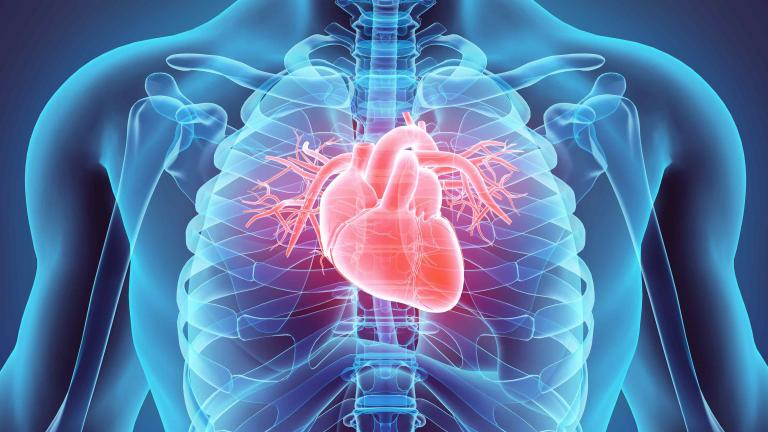

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The dataset includes 14 columns:
- age
- sex
- chest pain type (4 values; 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: presence of heart disease, 0 = False, 1 = True


The four variables we chose are resting blood pressure, age, maximum heart rate, and cholesterol. We chose Blood pressure because having high blood pressure is one of the biggest risks of heart disease, as stated on the CDC website.  Blood pressure increases the workload of the heart, as it is the pressure of blood pushing along arteries, and having a higher blood pressure makes the heart muscle become stiffer(Grey, 2021). We chose cholesterol because high cholesterol, according to the CDC, builds up and blocks the vessels, which can induce a heart attack, especially the "bad" type of cholesterol.  We chose maximum heart rate as a predictor because having a high heart rate is associated with a higher risk of mortality and heart-associated disease(Guillaume, et al.). As stated by Guillaume, et al., “...the risk associated with accelerated heart rate is not only statistically significant but also clinically relevant and that it should be taken into account in the evaluation of the patients.” We chose age because according to the CDC, with an increase in age, there is an increase in the risk of developing heart disease because there is a higher build of fatty deposits in arteries(narrower flow of blood in arteries) and also higher blood pressure


 We chose 4 specific predictors because of the online research(external resources) and readings we did prior, pinpointing the main contributors to heart disease, and we found out that these factors have an immense impact on increasing the risk of heart disease, and are the most important to consider. 


In [39]:
#reading data
heart_data <- read_csv(file = "heart.csv")
heart_data
print("Table 1")

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


[1] "Table 1"


# Methods and Results #

From the preliminary analysis from external resources about the predictors for heart disease that we stated in the introduction, we decided to investigate on whether using all of them will make a more accurate model to predict the presence of heart condition. 

**Methods:**
- *Data Wrangling*
- *Training/Testing Set Splitting*
- *Discovering the relationships between sex anh some other predictors in terms of heart disease through visualizations*
- *Selecting predictors/ deciding whether using all of these predictors are optimal to predict on heart conditions*
- *Building a model with K-Nearest Neighbors Classification*
- *Result and Conlusion*

## Data Wrangling ##

- We are going to select the <code>"age"</code>, <code>"sex"</code>, <code>"chol"</code>, <code>"trestbps"</code>, <code>"thalach"</code>, <code>"target"</code> columns that we are going to use.
- We also eliminate any "not available" values in the data set.
- We want to rename those columns and give them an appropriate name.
- Since the dataset gives us numerical variables, so we would change them into categorical variables in which "1" represents "male" and "0" means "female". We also want to change the data type into factor
- And also, we will change the determination of disease present from numerical value into categorical value in which "0" represents "false",  and "1" means "true". We change the data type into factor

In [40]:
#change to the variables into their true data type
heart_data  <- heart_data |>
    filter(rm.na = TRUE) |>
    mutate(sex = as_factor(sex), target = as_factor(target)) |>
    select(age, sex, chol, trestbps, thalach, target)

#Rename columns
colnames(heart_data) <- c("age", "sex", "cholesterol", "rest_bp", "max_heart_rate", "disease_present")

# changes 1 to male and 0 to female
levels(heart_data$sex) <- c("female", "male")
# changes disease_present to true/false (0 = false, 1 = true)
levels(heart_data$disease_present) <- c(FALSE, TRUE)

heart_data
print("Table 2")

age,sex,cholesterol,rest_bp,max_heart_rate,disease_present
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
52,male,212,125,168,FALSE
53,male,203,140,155,FALSE
70,male,174,145,125,FALSE
⋮,⋮,⋮,⋮,⋮,⋮
47,male,275,110,118,FALSE
50,female,254,110,159,TRUE
54,male,188,120,113,FALSE


[1] "Table 2"


 ## Splitting the Dataset ##

 - Based on the data we use in the wrangling step, we have **1025** observations.
- We will use a random split of **0.75**, which will make 75% of the data split out into our training set, and the rest of 25% of the data will move to the testing set.
- Splitting data into 0.75 for training set gives us the variety of cases available in the dataset to build the most effective model for prediction.
- The remaining 0.25 for testing set is sufficient to test on the accuracy of our classifier model
- We added the <code>set.seed()</code> argument to make our result reproducible and use the <code>initial_split()</code> argument to choose the sample from our data frame randomly.

In [4]:
set.seed(2106)
#spliting data into training set and testing set    
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease_present)
heart_train <- training(heart_split)
heart_testing <- testing(heart_split)

## Summarizing the Training Data ##

- For this section, we want to investigate on the relationships between each predictors to the the variable <code>disease_present</code>through visualizations and interpreting some of the descriptive statistics of the Training Data that are available for analysis.

In [25]:
#finding the counts and percentages for the presence of heart disease
heart_counts <- heart_train |>
    group_by(disease_present) |>
    summarize(count = n(),
              percent = (n() / nrow(heart_train)) * 100)

heart_counts
print("Tabv 3")

disease_present,count,percent
<fct>,<int>,<dbl>
FALSE,374,48.69792
TRUE,394,51.30208


[1] "Table 3"


- In the table above, we can see that it reports those observations in each class in which <code>"FALSE"</code> represents "no presence of heart disease", and <code>"TRUE"</code> means there is "presence of heart disease".
- We use <code>group_by(disease_present)</code> to group all rows by the <code>disease_present</code> in the data frame, and we use <code>n()</code> arguments to count the numbers observations in each class. 
- By comparing the training data, we observed that there are more cases of TRUE (presence of heart disease) than FALSE (no presence of heart disease) by 20 cases. 
- <code>"initial_split"</code>also ensures the same proportion class distribution for testing set as well. 
- The slightly different in percentages of patient with heart disease and with no heart disease is beneficial in a sense that we can use it to fit the model effectively because the classes are balanced.

In [31]:
heart_explore <- heart_train |>
    group_by(sex, disease_present) |>
    filter(disease_present == "TRUE") |>
    summarize(count = n(),
              avg_chol = mean(cholesterol),
              avg_mhr = mean(max_heart_rate),
              avg_restbp = mean(rest_bp))

heart_explore
print("Table 4")

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,disease_present,count,avg_chol,avg_mhr,avg_restbp
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
female,TRUE,170,255.4941,154.5529,129.1412
male,TRUE,224,230.6518,160.4107,128.6964


[1] "Table 4"


- We use <code>group_by(sex, disease_present)</code> argument to find the relationship between sex and disease presence.
- We only want to investigate on the positive diagnose for heart disease, so we filter the data frame to only take <code>disease_present == "TRUE"</code>
- In general, the training data have more male patients than female patients. There are also more male patients have been diagnosed with heart conditions.
- Male patients got diagnosed for heart disease with a lower average cholesterol in their body, lower average rest blood pressure and they also tend to have a higher average max heart rate. 
- However, there is a signigicantly lower female patients who have been diagnosed with heart diseases. They tend to be diagnosed when they have a higher average cholesterol, a higher average rest blood pressure and a lower average max heart rate. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



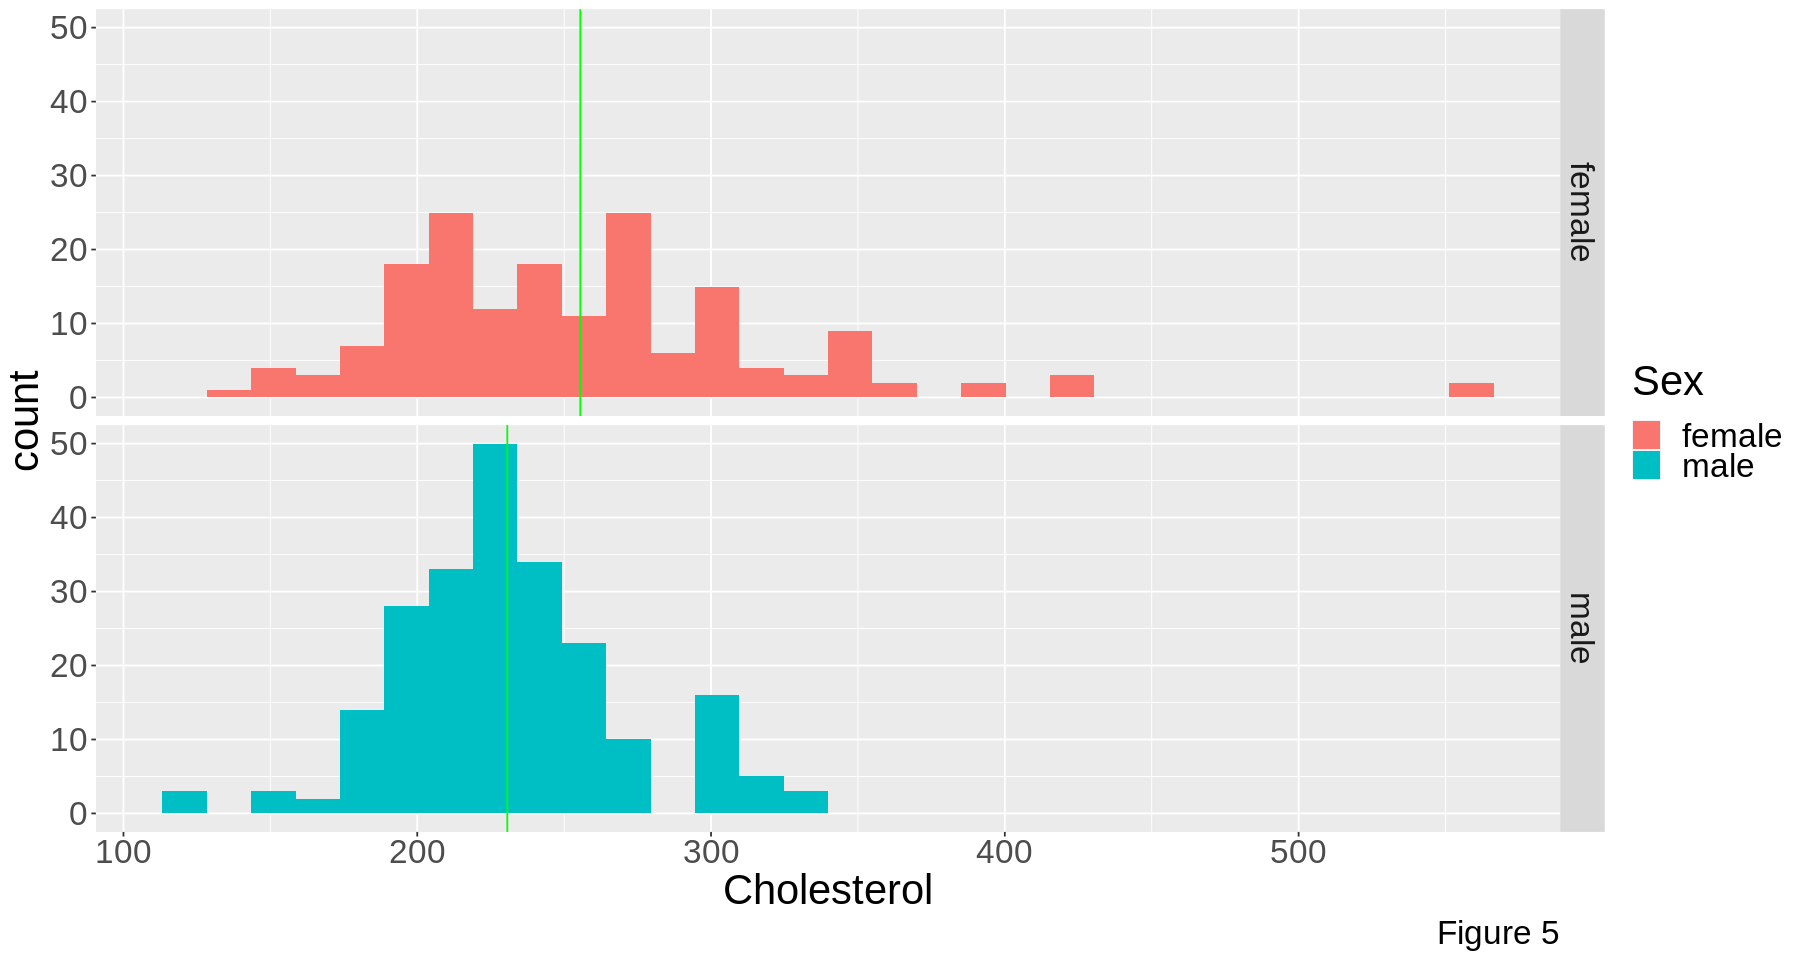

In [27]:
options(repr.plot.width = 15, repr.plot.height = 8)
#creating a visualization for the relationship between the diagnosis of heart disease and the average cholesterol level based on each sex
chol_mean <- heart_train |>
    filter(disease_present == "TRUE") |>
    group_by(sex) |>
    mutate(mean_chol = mean(cholesterol))

cholesterol_plot <- chol_mean |>
    filter(disease_present == "TRUE") |>
    ggplot(aes(x = cholesterol, fill = sex)) +
    geom_histogram() +
    labs(x = "Cholesterol", fill = "Sex", caption = "Figure 5") +
    facet_grid(rows = vars (sex)) +
    theme(text = element_text(size =25)) +
    geom_vline(aes(xintercept = mean_chol, group = sex), colour = 'green')

cholesterol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



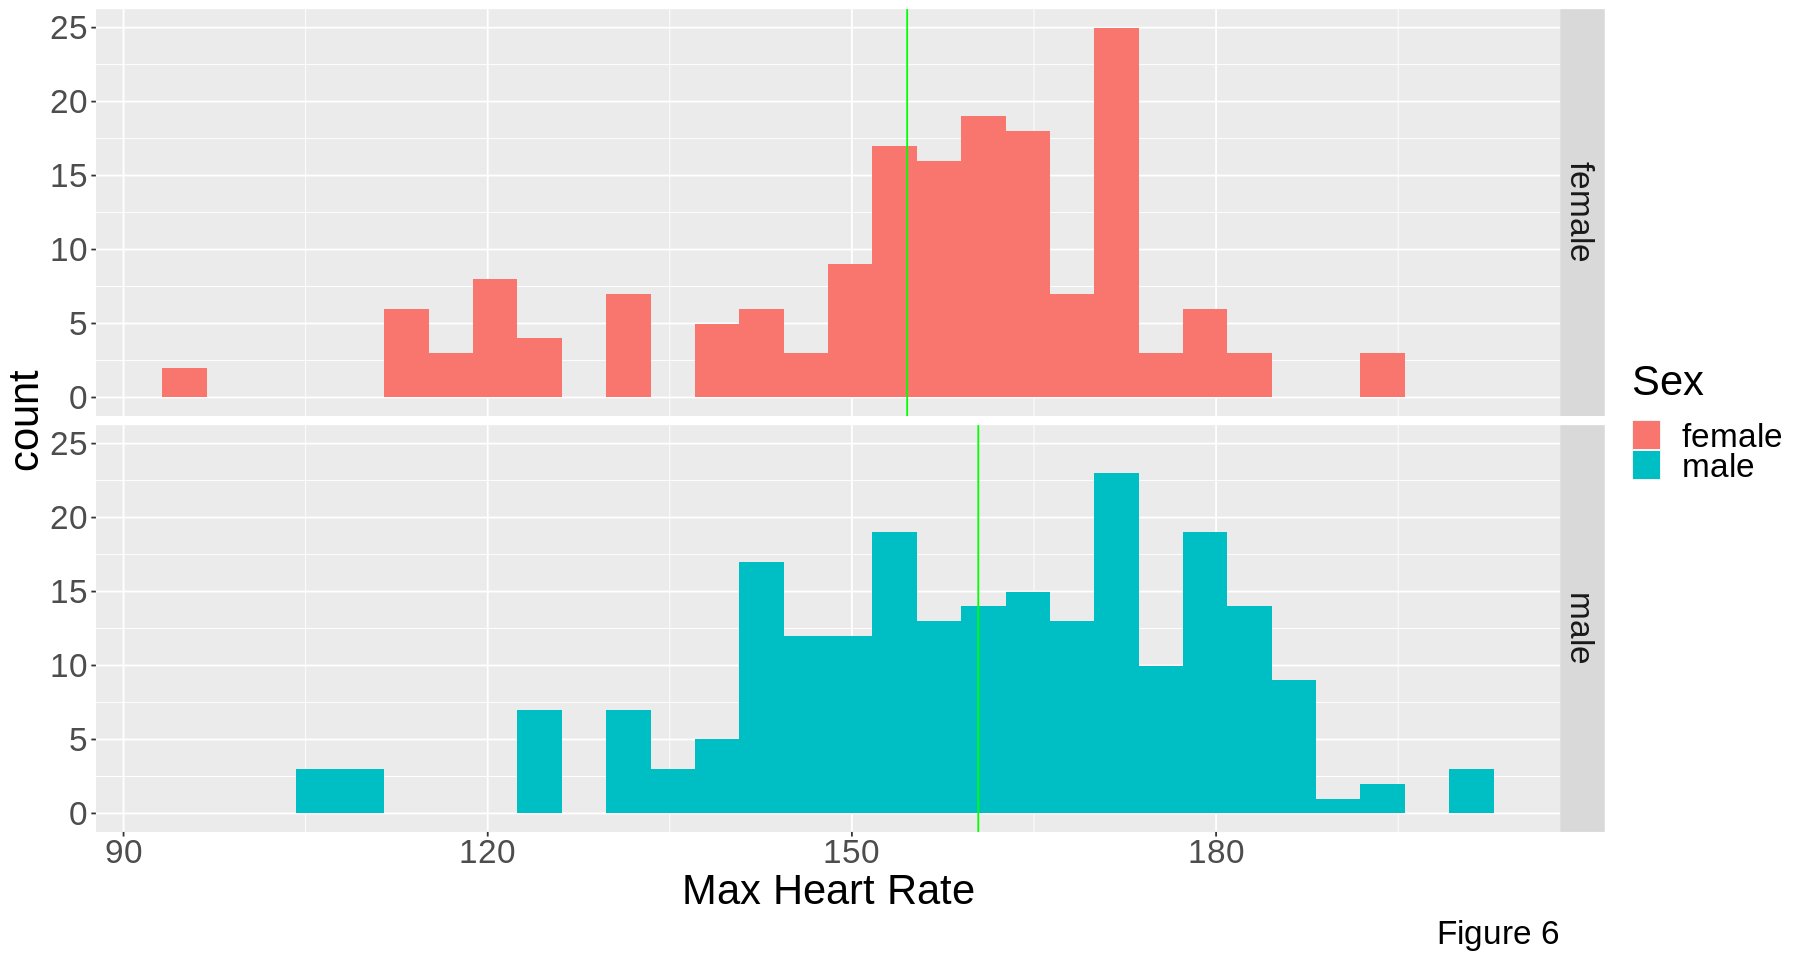

In [28]:
options(repr.plot.width = 15, repr.plot.height = 8)
#creating a visualization for the relationship between the diagnosis of heart disease and the average max heart rate based on each sex
mhr_mean <- heart_train |>
    filter(disease_present == "TRUE") |>
    group_by(sex) |>
    mutate(mean_mhr = mean(max_heart_rate))

mhr_plot <- mhr_mean |>
    filter(disease_present == "TRUE") |>
    ggplot(aes(x = max_heart_rate, fill = sex)) +
    geom_histogram() +
    labs(x = "Max Heart Rate", fill = "Sex", caption = "Figure 6") +
    facet_grid(rows = vars (sex)) +
    theme(text = element_text(size =25)) +
    geom_vline(aes(xintercept = mean_mhr, group = sex), colour = 'green')

mhr_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



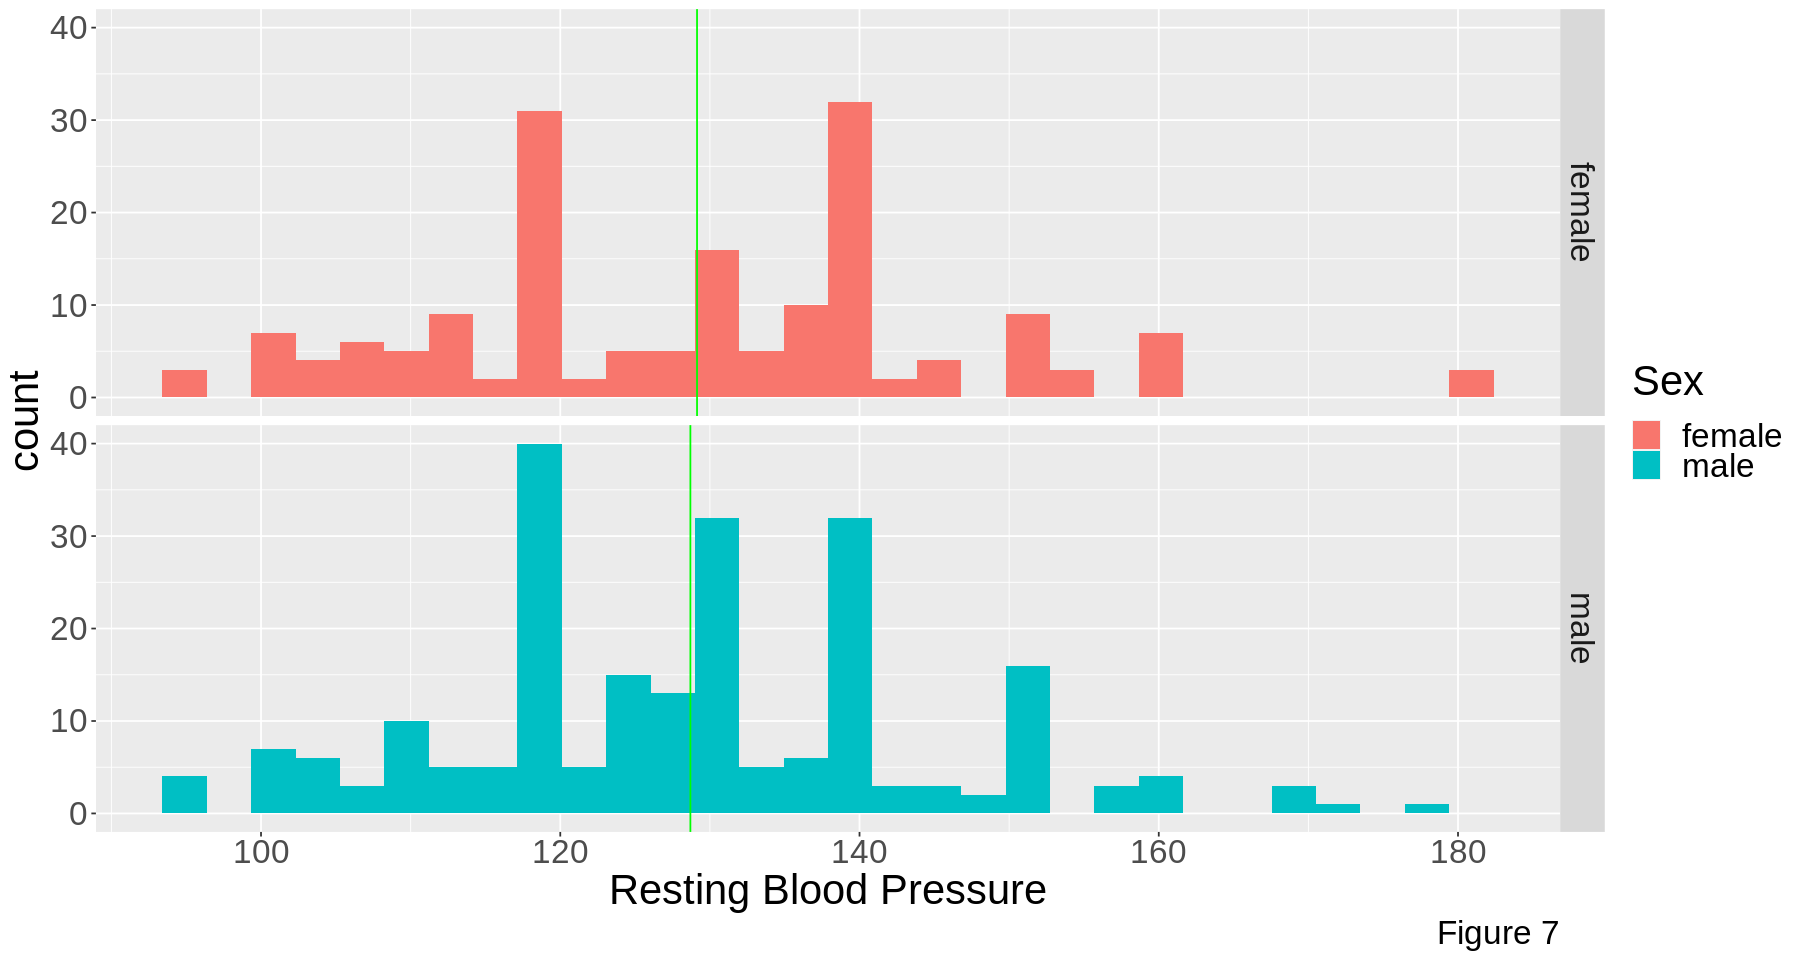

In [29]:
options(repr.plot.width = 15, repr.plot.height = 8)
#creating a visualization for the relationship between the diagnosis of heart disease and the average max heart rate based on each sex

rbp_mean <- heart_train |>
    filter(disease_present == "TRUE") |>
    group_by(sex) |>
    mutate(mean_rbp = mean(rest_bp))

rbp_plot <- rbp_mean |>
    filter(disease_present == "TRUE") |>
    ggplot(aes(x = rest_bp, fill = sex)) +
    geom_histogram() +
    labs(x = "Resting Blood Pressure", fill = "Sex", caption = "Figure 7") +
    facet_grid(rows = vars (sex)) +
    theme(text = element_text(size =25)) +
    geom_vline(aes(xintercept = mean_rbp, group = sex), colour = 'green')

rbp_plot


## Predictor Variable Selection ##



- As we converted variable "sex" into its preferred data type, which is catgorical type, we are unable to assess this data type along with other numerical types since KNN algorithm uses Euclidean distance and categorical data cannot be distanced unless encoded in numerical values. For now, we decided to only work with **age**, **cholesterol**, **rest_bp**, **max_heart_rate**, **disease_present** to find out whether we should use all of them as the predictors to enhance the model's accuracy.

- We found this step neccessary because simplicity and accuracy are important, hence we are look for any possibility of having less predictors with high accuracy at the same time.

- This is also a chance for us to check on the any redundancy variables that we included during the preliminary analysis from external sources.

- By attaining less predictors, we can prevent adding more noises into the model and to make it run efficiently. 



In [30]:
set.seed(1)
heart_subset <- heart_train |>
    select("age", "cholesterol", "rest_bp", "max_heart_rate", "disease_present")

names <- colnames(heart_subset|> select(-disease_present))

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_subset, v = 5, strata = disease_present)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("disease_present", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies
print("Table 8")



size,model_string,accuracy
<int>,<chr>,<dbl>
1,disease_present ~ cholesterol,0.7616712
2,disease_present ~ cholesterol+max_heart_rate,0.9401059
3,disease_present ~ cholesterol+max_heart_rate+age,0.9413705
4,disease_present ~ cholesterol+max_heart_rate+age+rest_bp,0.9427033


[1] "Table 8"


- As we can see, the accuracy increases gradually as we add more predictors into our model, however, the differences get smaller after  each trial of adding new predictor. 
- There must be a balance between accuracy and simplicity, since the accuracy is only increases by ~ 0.001 after each additional predictor, we chose **cholesterol** and **max_heart_rate** as our main predictors to build the model.


`geom_smooth()` using formula 'y ~ x'



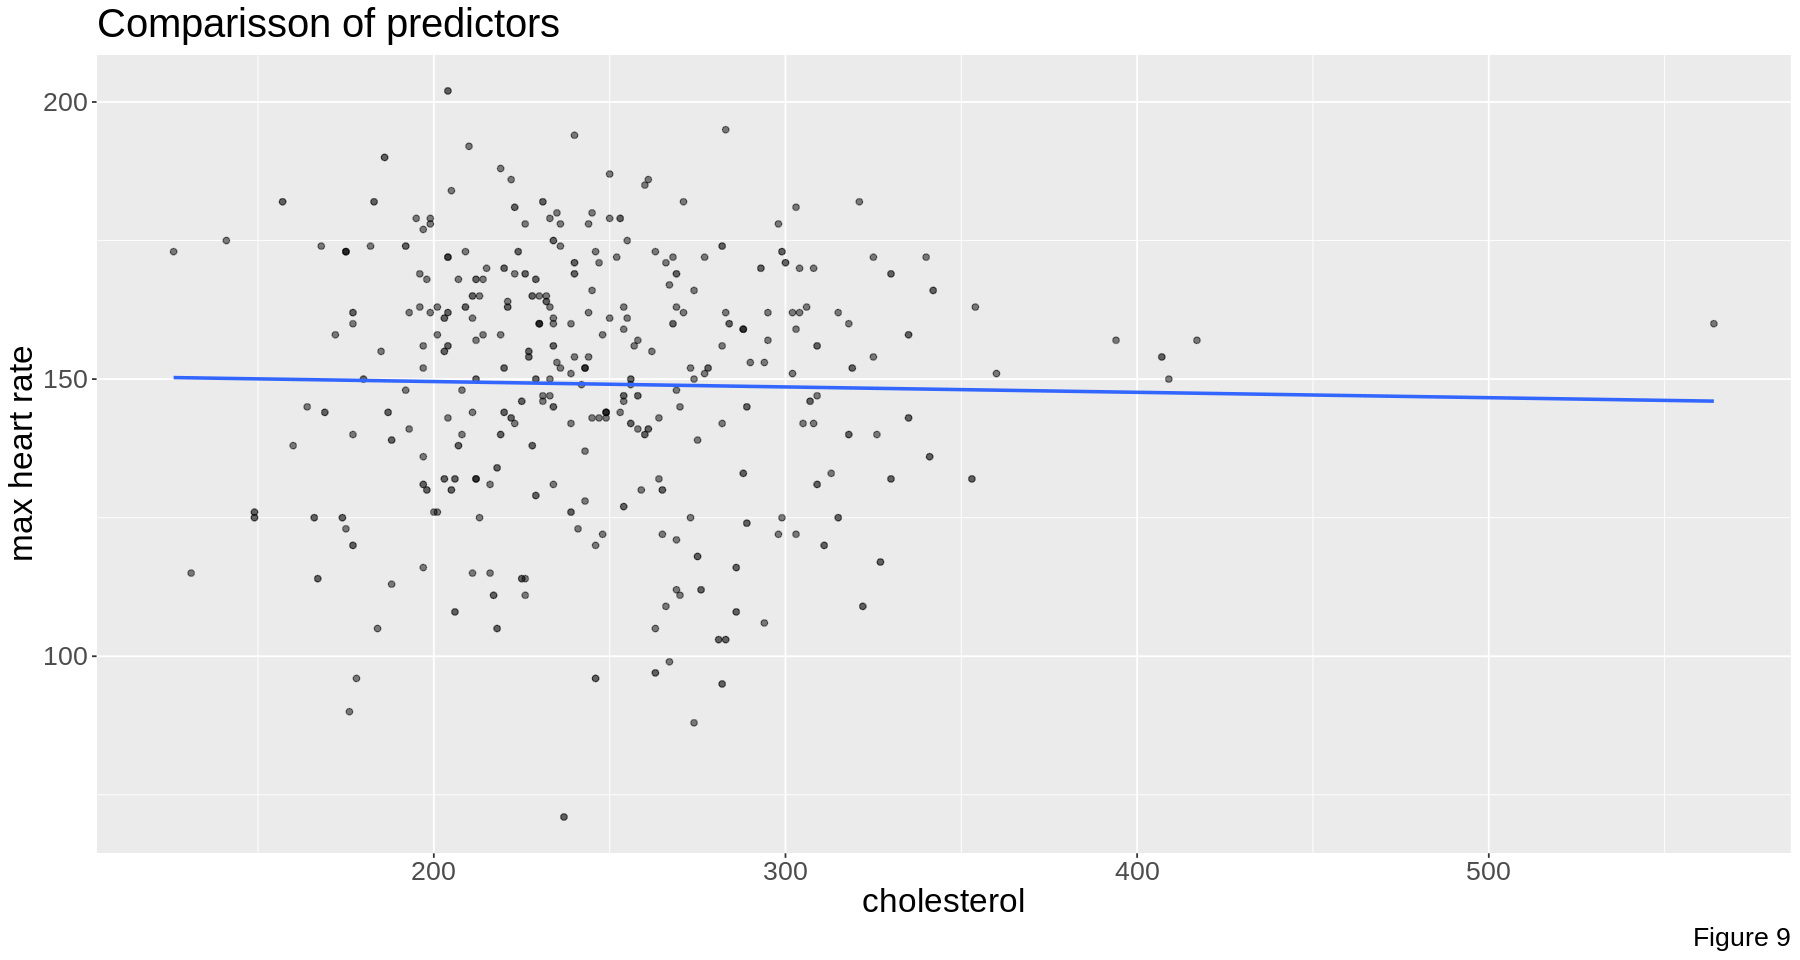

In [60]:
predictors_plot <- heart_data |>
    ggplot(aes(x = cholesterol, y = max_heart_rate)) +
    geom_point(alpha = 0.2) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(x = "cholesterol", y = "max heart rate", caption = "Figure 9") +
    theme(text = element_text(size = 20)) +
    ggtitle("Comparisson of predictors")
predictors_plot

- Figure 9 shows that there is essentially no relationship between cholesterol and max heart rate
- It can also be observed that there are a few outliers in the data set

## Tuning

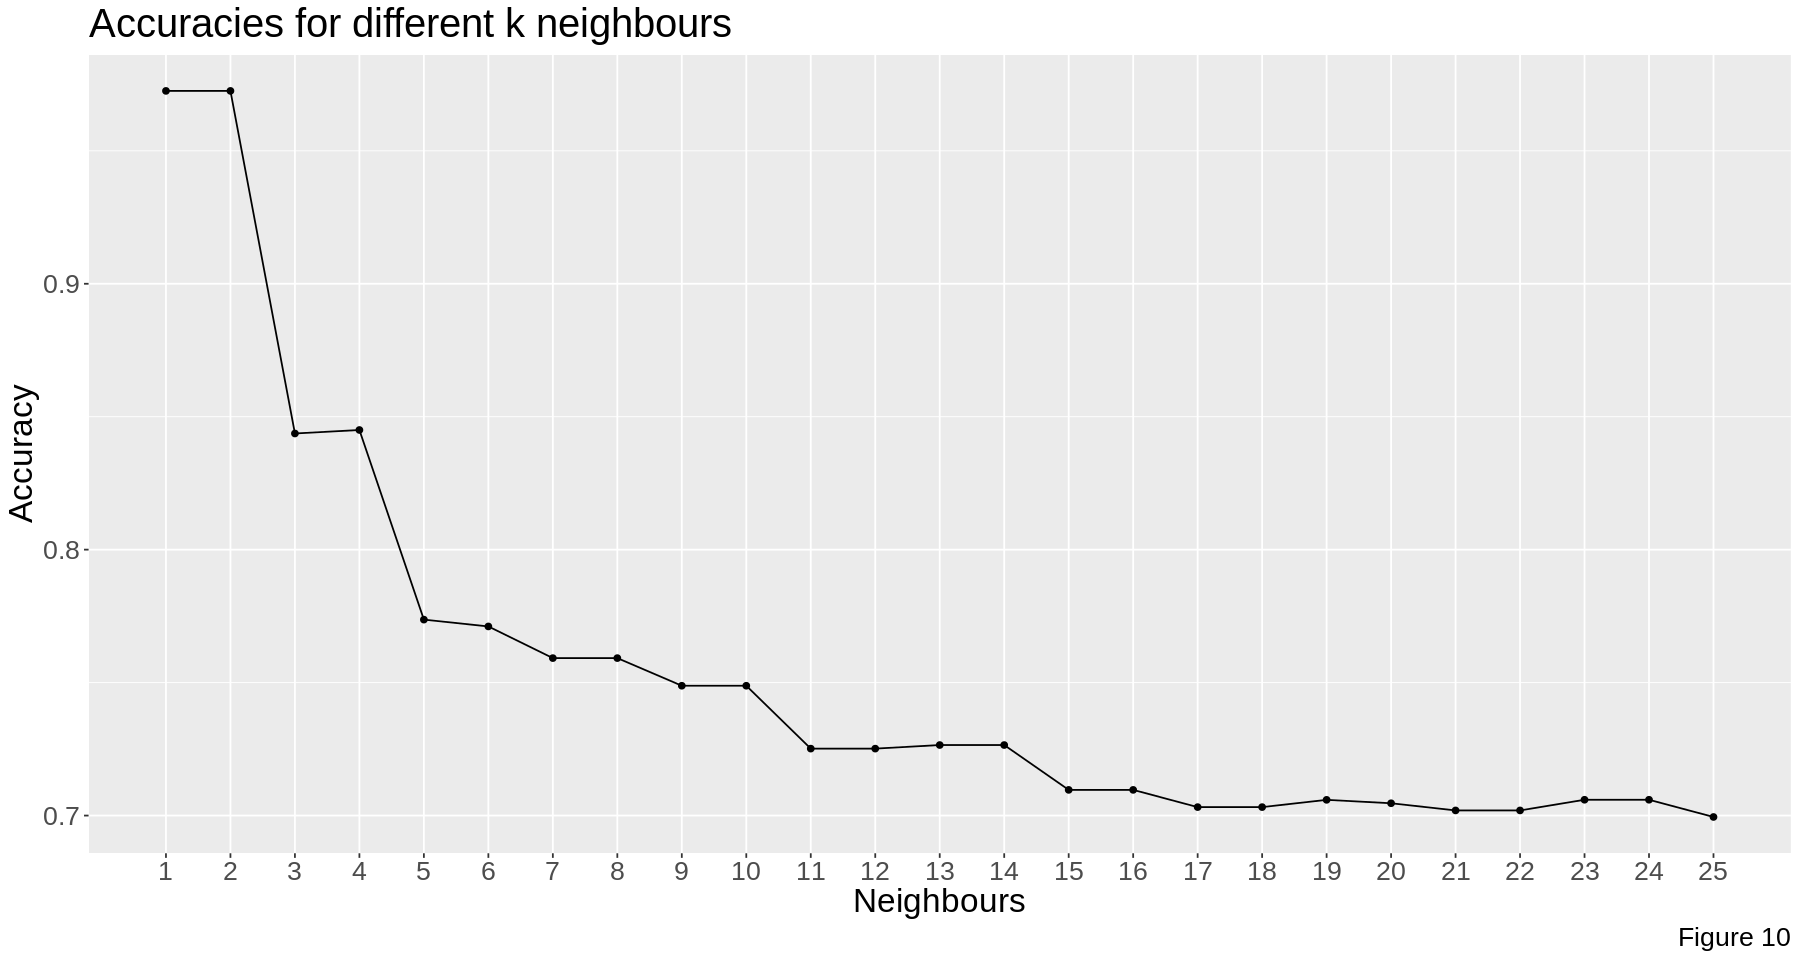

In [49]:
options(repr.plot.width = 15, repr.plot.height = 8)

set.seed(2106)
heart_recipe <- recipe(disease_present ~ cholesterol + max_heart_rate, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

vfold <- vfold_cv(heart_train, v = 10, strata = disease_present)

gridvals <- tibble(neighbors = seq(1, 25))

results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_validation_plot <- results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(limits = c(1, 25), breaks = seq(1, 25), minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20)) +
    ggtitle("Accuracies for different k neighbours") +
    labs(x = "Neighbours", y = "Accuracy", caption = "Figure 10")

cross_validation_plot

- The first step in the tuning proccess is to train the classifier to predict whether the disease is present using cholesterol and max heart rate
- Because we are doing cross validation, in the model specification we set neighbours to <code>tune()</code> to choose the best number of neighbours from k = 1 to k = 25
- Cross validation is performed on the training portion of the heart data in order to find the number of neghbours that optimizes the accuracy of the model
- We chose to do cross validation with 10 folds, meaning that the training data is partitioned 10 times to find the accuracy of each of the 10 folds, which is then divided by the number of folds (10) to find the total accuracy
- The step above is repeated for each value of k
- Then the workflow was created by adding the recipe and the specification along with the tune_grid function
- Finally, we used the collect_metrics function to collect the accuracy across each fold, which was then used to create the plot (Figure 10)

Figure 9 shows that the number of neighbours that maximizes the accuracy of the model is at k = 2. Although k = 1 also has a similiar accuracy, we decided to choose neighbours of k = 2 because it is using more data points for the classification. Figure 9 also shows a negative relationship between accuracy and neighbours meaning that as neighbours increase the accuracy decreases. This is an interesting observation because this shows that the data is noisy (Figure 9) since decreasing the number of neighbours allows each individual data point to have stronger influence on the classification.


## KNN Classification Testing ##

In [63]:
#Create the best KNN model
knn_spec_heart <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
                                   set_engine("kknn") |>
                                   set_mode("classification")

#Final recipe for centering and scaling                                    
knn_recipe_heart <- recipe(disease_present ~ cholesterol + max_heart_rate, data = heart_train) |>
                                   step_scale(all_predictors()) |>
                                   step_center(all_predictors())

#using workflow to combine the recipe and model
knn_fit_heart <- workflow() |>
    add_recipe(knn_recipe_heart) |>
    add_model(knn_spec_heart) |>
    fit(data = heart_train)
                                   
#predicting the newly introduce observations with the recipe and model created
heart_test_prediction <- predict(knn_fit_heart, heart_testing) |>
                                   bind_cols(heart_testing) 
                                
                                

#make a confusion matrix
heart_confusion_df <- heart_test_prediction |>
    conf_mat(truth = disease_present, estimate = .pred_class)



heart_accuracy <- heart_test_prediction |>
    metrics(truth = disease_present, estimate = .pred_class) |>
                                   select(.metric, .estimate) |>
                                    head(1)


heart_test_prediction
print("Table 11")

.pred_class,age,sex,cholesterol,rest_bp,max_heart_rate,disease_present
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,53,male,203,140,155,FALSE
FALSE,62,female,294,138,106,FALSE
FALSE,55,male,289,160,145,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,60,male,258,125,141,FALSE
FALSE,47,male,275,110,118,FALSE
TRUE,50,female,254,110,159,TRUE


[1] "Table 11"


In [61]:
heart_confusion_df
print("Table 12")

          Truth
Prediction FALSE TRUE
     FALSE   125    3
     TRUE      0  129

[1] "Table 12"


In [62]:
heart_accuracy
print("Table 13")

.metric,.estimate
<chr>,<dbl>
accuracy,0.9883268


[1] "Table 13"


- We created a model and also a recipe on the training set, then tied them together by using <code>workflow()</code>. 
- Predicting on the testing set by applying the model.
- The results show that out of 257 newly introduced observations, the model has predicted 254 of them correctly with 98.8% accurate. The other 3 wrong predictions are when the prediction are FALSE but the true diagnosis are TRUE. 


# Discussion

A possible drawback in our analysis as shown by Figure 9 is that the each individual data point has a stronger influence on the classification of the model because there is a steep decline in accuracy at k > 2. This can be considered problematic because the model can be easily influenced by outliers; when otherwise the effects of outliers can be decreased by taking the average of more neighbours. A solution to this problem is to use predictors for the model that have a stronger relationship with eachother as opposed to the relationship in Figure 9.

Our research analysis could be extended by:
- Including different health variables as possible indicators of heart disease such as BMI or blood sugar levels

## References

https://www.cdc.gov/cholesterol/myths_facts.htm

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. 

Grey, H. Heart disease & age. memorial Hermann. (2021, December 27). Retrieved October 29, 2022, from https://memorialhermann.org/services/specialties/heart-and-vascular/healthy-living/education/heart-disease-and-age 

Perret-Guillaume C, Joly L, Benetos A. Heart rate as a risk factor for cardiovascular disease. Prog Cardiovasc Dis. 2009 Jul-Aug;52(1):6-10. doi: 10.1016/j.pcad.2009.05.003. PMID: 19615487.
U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved October 29, 2022, from https://www.nia.nih.gov/health/heart-health-and-aging#changes 
